In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [15]:
import pandas as pd

checkout = pd.read_csv(path_data+'checkout.csv', index_col=0)
AdSmart = pd.read_csv(path_data+'AdSmart.csv')

display(checkout.head(), AdSmart.head())

,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,877621,A,29.410131,1.0,F,chrome,66.168628
1,876599,A,NaN,0.0,M,firefox,49.801887
2,905407,A,27.446845,1.0,M,chrome,56.744856
3,883562,A,30.602233,1.0,M,safari,71.890718
4,840542,A,29.668895,1.0,F,safari,67.410696


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


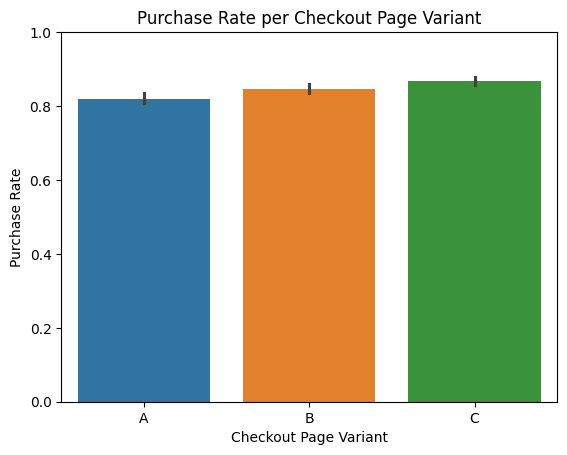

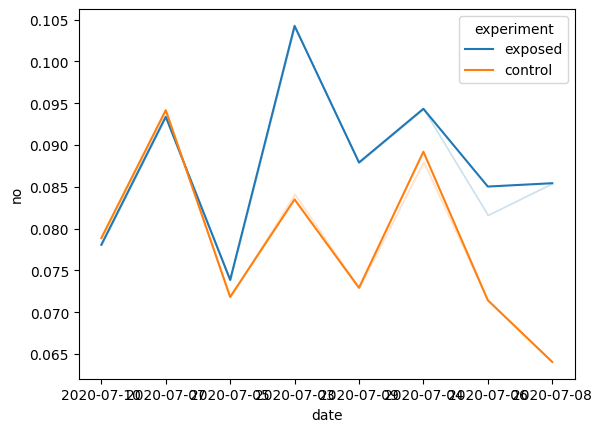

"\nGood job exploring the data! Did you find any useful insights that stand out? Now you're ready to dig deeper.\n"

In [19]:
# exercise 01

"""
Proportions EDA

Exploratory data analysis (EDA) allows us to get an initial understanding of the data. Summary statistics explain the magnitude, direction, and spread of our average metrics, and visual distributions and trends provide deeper insights into understanding what to look for and uncovering interesting patterns that can be masked under the average summary statistics.

Consider yourself a Data Analyst about to start digging into A/B testing data at the initial EDA stage before running any statistical tests. See what you can find in the data that looks interesting to you. AdSmart and checkout DataFrames, as well as pandas as pd, NumPy and np, Matplotlib.pyplot as plt, and Seaborn as sns, have already been loaded for you.

The Adsmart Kaggle dataset source is linked here.
(https://www.kaggle.com/datasets/osuolaleemmanuel/ad-ab-testing)
"""

# Instructions

"""

    Calculate the mean, standard deviation and count of the purchased column by checkout_page in one line of code.
---

    Create a bar plot of average purchase rate per checkout_page.
---

    Plot the proportion of 'no' responses over experiment duration per experiment variant in the AdSmart dataset.

"""

# solution

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean, standard deviation and count
checkout.groupby('checkout_page')['purchased'].agg({'mean','std','count'})

# Create a bar plot of average purchase rate per checkout page
sns.barplot(data=checkout,x='checkout_page', y='purchased', hue='checkout_page', estimator=np.mean)
plt.ylim(0, 1)
plt.title('Purchase Rate per Checkout Page Variant')
plt.xlabel('Checkout Page Variant')
plt.ylabel('Purchase Rate')
plt.show()
# This code clears the bar plot
plt.clf()

# Plot the proportion of 'no' responses over experiment duration
sns.lineplot(data=AdSmart, x='date', y='no', hue='experiment', errorbar=('ci', False))
plt.show()

#----------------------------------#

# Conclusion

"""
Good job exploring the data! Did you find any useful insights that stand out? Now you're ready to dig deeper.
"""

In [23]:
homepage = pd.read_csv(path_data+'homepage.csv', index_col=0).reset_index(drop=True)
homepage.head()

,user_id,landing_page,signup,time_on_page
0,511265,A,0.0,36.466340
1,369773,A,1.0,27.601022
2,433024,A,0.0,31.361797
3,214829,A,0.0,39.565806
4,77688,A,0.0,37.139127


In [24]:
# exercise 02

"""
A/B test data cleaning

A/B testing data cleaning is no different from the usual process taught in data cleaning and manipulation courses. However, understanding the context and data logging behavior of each A/B test on a case-by-case basis enables you to make decisions about how to handle messy data. Dropping or keeping duplicates or missing values are two cases where we need to be careful with our metric definitions and how consistent these are across variants.

AdSmart and homepage DataFrames as well as pandas and numpy libraries are loaded for you.

The Adsmart Kaggle dataset source is linked here.
"""

# Instructions

"""

    Check for duplicate rows in the AdSmart dataset by printing number of rows.
---

    Calculate the number of unique users in group B, then compute two different metrics: one looks at the unique users who signed up at least one time, and another that sums up all signups in the group.
---
Question

    What is the most likely reason why the two last numbers are the same?

Possible answers:

Since we are working with probabilities, this happened due to chance.

Because we have no duplicate user_ids in the dataset.

Because there are no duplicate user_ids and the signup event can only happen once per user.{Answer}
"""

# solution

# Check for duplicate rows due to logging issues 
print(len(AdSmart))
print(len(AdSmart.drop_duplicates(keep='first')))

# Calculate the unique users in group B and compute the metrics
print(homepage[homepage['landing_page'] == 'B']['user_id'].count())

print(homepage[homepage['landing_page'] == 'B'].groupby('user_id')['signup'].unique().count())

print(homepage[homepage['landing_page'] == 'B']['signup'].sum())

#----------------------------------#

# Conclusion

"""
Great job! We couldn't find duplicate user_ids and a signup event is something a user can only do one time.
"""

8077
8077
2700
2700
143.0


"\nGreat job! We couldn't find duplicate user_ids and a signup event is something a user can only do one time.\n"

In [25]:
# exercise 03

"""
SRM

When we design an experiment to allocate enrollment units (e.g. users) at a given percentage per variant, we expect some slight variations to happen due to logging issues, delays, minor instrumentation bugs, etc. When that deviation is larger than what is expected, however, this is usually an indication of a larger issue that could invalidate and bias our test results. The goal of this exercise is to examine the statistical techniques that enable you to catch cases where the allocation mismatch is too large to be blamed on chance alone.

As an analytics engineer, your role may require you to design and even automate frameworks for catching sample ratio mismatches in A/B tests. The checkout DataFrame is loaded for you along with pandas and numpy libraries. Let's consider the control group to be checkout design 'A' and the treatment group to be 'B'.
"""

# Instructions

"""

    Calculate the number of unique users (user_id) in groups 'A' and 'B' and assign the total number of users to the variable total_users.
---

    Calculate the control and treatment percentages, and use them to create a list of expected and observed allocation ratios.
---

    Run a chisquare test between the calculated allocations with a significance threshold of 1%, and check for the likelihood of sample ratio mismatch; does the test seem valid from an allocation ratio perspective?

"""

# solution

# Assign the unqiue counts to each variant
control_users = checkout[checkout['checkout_page'] == 'A']['user_id'].nunique()
treatment_users = checkout[checkout['checkout_page'] == 'B']['user_id'].nunique()
total_users = control_users + treatment_users
print("Control unique users:",control_users)
print("Control unique users:",treatment_users)

# Calculate the percentages and create two lists
control_perc = control_users / total_users
treatment_perc = treatment_users / total_users
print("Percentage of users in the Control group:",100*round(control_perc,5),"%")
print("Percentage of users in the Exposed group:",100*round(treatment_perc,5),"%")

observed = [ control_users, treatment_users ]
expected = [ total_users/2, total_users/2 ]

# Run chisquare test on observed and expected lists and print the results
from scipy.stats import chisquare
chi = chisquare(observed, f_exp=expected)

print(chi)
if chi[1] < 0.01:
    print("SRM may be present")
else:
    print("SRM likely not present")

#----------------------------------#

# Conclusion

"""
Looking good! Since the p-value is quite high, it's very unlikely that there is a mismatch that could point to a bug in the allocation setup.
"""

Control unique users: 2940
Control unique users: 2938
Percentage of users in the Control group: 50.017 %
Percentage of users in the Exposed group: 49.983 %
Power_divergenceResult(statistic=0.0006805035726437564, pvalue=0.9791883740327534)
SRM likely not present


"\nLooking good! Since the p-value is quite high, it's very unlikely that there is a mismatch that could point to a bug in the allocation setup.\n"

In [26]:
# exercise 04

"""
Distributions balance

Another way we can quickly check for randomization bias in our A/B tests is by looking at how balanced or imbalanced the distributions of metrics and attributes that shouldn't change between the different variants. Any major differences in the percentage of certain devices, browsers, or operating systems for examples, assuming our samples are large enough, could be symptoms of larger problems in our internal setup. Examine the AdSmart and checkout datasets that are loaded for you and check for internal validity using the attributes distributions. Which dataset seems to have a more valid internal setup?

The Adsmart Kaggle dataset source is linked here.
"""

# Instructions

"""

    Check the distribution of platform_os across experiment groups in the AdSmart dataset.
---
    Check the distribution of gender across checkout_page designs in the checkout dataset.

"""

# solution

# Check the distribution of platform_os by experiment groups
print(AdSmart.groupby('experiment')['platform_os'].value_counts(normalize=True))

#----------------------------------#

# Check the distribution of gender by checkout_page
print(checkout.groupby('checkout_page')['gender'].value_counts(normalize=True))

#----------------------------------#

# Conclusion

"""
Great work there! Looks like the AdSmart dataset may have some randomization bias! Further investigations and root-cause analysis may be needed before we can gather any valid conclusions from this data.
"""

experiment  platform_os
control     6              0.924343
            5              0.075657
exposed     6              0.969795
            5              0.029955
            7              0.000250
Name: proportion, dtype: float64
checkout_page  gender
A              M         0.505000
               F         0.495000
B              F         0.507333
               M         0.492667
C              F         0.520333
               M         0.479667
Name: proportion, dtype: float64


'\nGreat work there! Looks like the AdSmart dataset may have some randomization bias! Further investigations and root-cause analysis may be needed before we can gather any valid conclusions from this data.\n'

In [33]:
novelty = pd.read_csv(path_data+'novelty.csv', index_col=0, parse_dates=['date'], date_format='%Y-%m-%d')
novelty

,date,CTR_lift,ToP_lift,purchase_rate,CTR
0,2023-01-01,0.060,15.0,0.030,0.052
1,2023-01-02,0.055,14.0,0.020,0.050
2,2023-01-03,0.050,11.0,0.022,0.052
3,2023-01-04,0.035,7.0,0.020,0.050
4,2023-01-05,0.040,8.0,0.020,0.050
5,2023-01-06,0.035,7.0,0.026,0.051
6,2023-01-07,0.037,9.0,0.031,0.053
7,2023-01-08,0.035,7.0,0.029,0.052
8,2023-01-09,0.034,8.5,0.020,0.050
9,2023-01-10,0.035,7.0,0.020,0.050


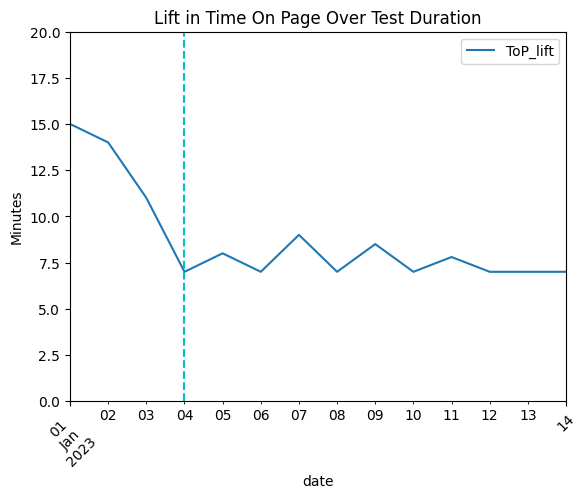

'\nNice work there! Looks like the treatment effect starts getting stable around January 4th. The results of the sustained effects would be more accurately represented by the data logged after that date.\n'

In [34]:
# exercise 05

"""
Novelty effects detection

Novelty effects happen more often than most Data Scientists and Engineers would expect. Running an A/B test on one new cool feature and calling the decision after seeing a big uptick in usage metrics over the first few days is one of the common mistakes that junior analysts fall into.

The novelty dataset that is loaded for you, has data about the difference in average time on page per user (ToP) between two variants. Examine the results over time and check if there are any signs of novelty effects. Would you include all the results form the start to the end of the test?
"""

# Instructions

"""

    Plot the lift in the Time-on-Page metric ToP_lift over the experiment's duration.
---

    Place a vertical dashed line at the first date where you notice the Time on Page metric stated to stabilize.

"""

# solution

# Plot ToP_lift over the test dates
novelty.plot('date', 'ToP_lift')
# Add a vertical dashed line
plt.axvline(x='2023-01-04',color='c',linestyle='dashed')
plt.title('Lift in Time On Page Over Test Duration')
plt.xticks(rotation=45)
plt.ylabel('Minutes')
plt.ylim([0, 20])
plt.show()

#----------------------------------#

# Conclusion

"""
Nice work there! Looks like the treatment effect starts getting stable around January 4th. The results of the sustained effects would be more accurately represented by the data logged after that date.
"""

In [35]:
simp_balanced = pd.read_csv(path_data+'simp_balanced.csv')
simp_imbalanced = pd.read_csv(path_data+'simp_imbalanced.csv')

display(simp_balanced.head(), simp_imbalanced.head())

,Variant,Device,Browser,Conversion
0,A,Phone,Chrome,1
1,A,Phone,Chrome,1
2,A,Phone,Chrome,1
3,A,Phone,Chrome,1
4,A,Phone,Chrome,1


,Variant,Device,Browser,Conversion
0,A,Phone,Chrome,1
1,A,Phone,Chrome,1
2,A,Phone,Chrome,1
3,A,Phone,Chrome,1
4,A,Phone,Chrome,1


In [36]:
# exercise 06

"""
Simpson's paradox in action

Generalizing our A/B test results to different segments of the population can be of utmost importance to the business. Sometimes we want to save the cost of running other tests in different cities, by different devices, etc. Making sure that our results are consistent by subpopulations can increase our confidence to make such generalizations.

Examine the simp_balanced and simp_imbalanced datasets for Simpson's paradox to gain a good sense for how this phenomena can occur in A/B testing scenarios.
"""

# Instructions

"""

    Calculate the conversion rates of each Variant separately and by Browser.
---

    Compute the counts of browsers in each variant to examine how balanced the distributions are.
---

    Replace the imbalanced DataFrame simp_imbalanced with the balanced one simp_balanced and re-examine the results.
---
Question

    What can we conclude about the observed data in the simp_balanced DataFrame?

Possible answers:
    Variant A has a consistently higher conversion rate overall and by browser, and the balanced browser distribution gives us confidence in the validity of the results. {Answer}

    Variant A has a higher conversion rate overall but the results mysteriously reversed by browser type.
    
    The distribution of browser type is imbalanced between the groups resulting in a sign of Simpson's Paradox.
"""

# solution

# Calculate the conversion rate per variant and then browser
imbalanced_variant_rate = simp_imbalanced.groupby('Variant')['Conversion'].mean()
imbalanced_variant_browser_rate = simp_imbalanced.groupby(['Variant','Browser'])['Conversion'].mean()

print(imbalanced_variant_rate)
print(imbalanced_variant_browser_rate)

# Examine the counts of browser types per variant
imbalanced_variant_browser_count = simp_imbalanced.groupby(['Variant','Browser'])['Browser'].count()

print(imbalanced_variant_browser_count)

# Repeat the calcluation for the balanced dataset
balanced_variant_rate = simp_balanced.groupby('Variant')['Conversion'].mean()
balanced_variant_browser_rate = simp_balanced.groupby(['Variant','Browser'])['Conversion'].mean()
balanced_variant_browser_count = simp_balanced.groupby(['Variant','Browser'])['Browser'].count()

print(balanced_variant_rate)
print(balanced_variant_browser_rate)
print(balanced_variant_browser_count)

#----------------------------------#

# Conclusion

"""
That's exactly right! Keeping Simpson's paradox in mind when performing sanity checks on your A/B test's will give you the confidence to generalize the results to the wider population.
"""

Variant
A    0.80
B    0.64
Name: Conversion, dtype: float64
Variant  Browser
A        Chrome     0.921053
         Safari     0.416667
B        Chrome     0.928571
         Safari     0.527778
Name: Conversion, dtype: float64
Variant  Browser
A        Chrome     38
         Safari     12
B        Chrome     14
         Safari     36
Name: Browser, dtype: int64
Variant
A    0.70
B    0.52
Name: Conversion, dtype: float64
Variant  Browser
A        Chrome     0.833333
         Safari     0.500000
B        Chrome     0.666667
         Safari     0.300000
Name: Conversion, dtype: float64
Variant  Browser
A        Chrome     30
         Safari     20
B        Chrome     30
         Safari     20
Name: Browser, dtype: int64


"\nThat's exactly right! Keeping Simpson's paradox in mind when performing sanity checks on your A/B test's will give you the confidence to generalize the results to the wider population.\n"

In [37]:
# exercise 07

"""
Difference in proportions A/B test

You are data scientist running an A/B test to explore the differences in signup (conversion) rates between two landing page variants 'C' and 'D' loaded in the homepage dataset. You are tasked with guiding the team using your A/B test results to make a decision regarding which landing page variant would result in a higher signup rate if rolled out to the website traffic.

homepage is available and has the columns signup and landing_page. Every row in the DataFrame corresponds to a unique user visiting the respective landing_page. The signup column consists of binary data: '1' means the user signed up and '0' means abandoned the page. pandas and numpy have been loaded for you.
"""

# Instructions

"""

    Calculate the number of unique users in landing_page 'C' and 'D'.
---

    Calculate the total number of unique user signups for landing_page 'C' and 'D' and assign it to a list.
---

    Calculate the z_stat, p-value, and 95% confidence intervals for the results.
---
Question

    With a 0.05 significance threshold, what will your decision be?

Possible answers:
    Fail to reject the Null hypothesis that landing pages C and D have the same signup rate.

    Reject the Null hypothesis that landing pages C and D have the same signup rate. {Answer}
"""

# solution

from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Calculate the number of users in groups C and D
n_C = homepage[homepage['landing_page'] == 'C']['user_id'].nunique()
n_D = homepage[homepage['landing_page'] == 'D']['user_id'].nunique()
print('Group C users:',n_C)
print('Group D users:',n_D)

# Compute unique signups in each group and assign to lists
signup_C = homepage[homepage['landing_page'] == 'C'].groupby('user_id')['signup'].max().sum()
signup_D = homepage[homepage['landing_page'] == 'D'].groupby('user_id')['signup'].max().sum()

signups_abtest = [signup_C, signup_D]
n_cdtest = [n_C, n_D]

# Calculate the z_stat, p-value, and 95% confidence intervals
z_stat, pvalue = proportions_ztest(signups_abtest, nobs=n_cdtest)
(C_lo95, D_lo95), (C_up95, D_up95) = proportion_confint(signups_abtest, nobs=n_cdtest, alpha=0.05)

print(f'p-value: {pvalue:.4f}')
print(f'Group C 95% CI : [{C_lo95:.4f}, {C_up95:.4f}]')
print(f'Group D 95% CI : [{D_lo95:.4f}, {D_up95:.4f}]')

#----------------------------------#

# Conclusion

"""
That is correct! Since the p-value is lower than the significance threshold of 0.05, we can reject the Null hypothesis that the rates are equal.
"""

Group C users: 2700
Group D users: 2700
p-value: 0.0092
Group C 95% CI : [0.0548, 0.0733]
Group D 95% CI : [0.0397, 0.0558]


'\nThat is correct! Since the p-value is lower than the significance threshold of 0.05, we can reject the Null hypothesis that the rates are equal.\n'

# Interpretation of confidence intervals

Interpreting confidence intervals can be tricky. They are specific to the process that generates them and vary slightly between different samples. They represent a statement about the long-term probabilities if we repeat the sampling process many times.

Which one of the following statements is the most accurate?

### Possible Answers


    A 95% confidence interval of the average sales per customer of [$10, $20] means that we can be 95% confident that the population mean is between $10 and $20. {Answer}
    
    
    All else being equal, as the confidence level increases, the confidence interval decreases.
    
    
    A 90% confidence interval of [3.5, 5] minutes of time on page means that 90% of the data in the population falls between 3.5 and 5 minutes.

**That is correct! Confidence intervals give us the long-term probability that a range of plausible values would cover the population mean.**

In [45]:
# exercise 08

"""
Confidence intervals for proportions

Drawing random samples from a population produces slightly different confidence intervals.

The confidence level represents the percentage of the those intervals that capture the true population parameter. For example, we can expect that 90% of the confidence intervals produced at the 90% confidence level to contain the population parameter. pandas, numpy, and proportion_confint have been imported for you.
"""

# Instructions

"""

    Assuming our whole population is the users in checkout_page 'A', calculate the mean purchase rate.
---

    Calculate 20 90% confidence intervals of purchase rate for 20 random samples of size 100 each.
---

    Repeat the previous step with 99% confidence intervals instead of 90%. Are the intervals wider or narrower? Does the result make sense?
---

"""

# solution

# Calculate the average purchase rate for group A
pop_mean = checkout[checkout['checkout_page'] == 'A']['purchased'].mean()
print(pop_mean)

# Calculate 20 90% confidence intervals for 20 random samples of size 100 each
for i in range(20):
    confidence_interval = proportion_confint(
    	count=checkout[checkout['checkout_page'] == 'A'].sample(100)['purchased'].sum(), 
      	nobs=100, 
      	alpha=(1 - 0.90))
    print(confidence_interval)
    
# Calculate 20 99% confidence intervals for 20 random samples of size 100 each
for i in range(20):
    confidence_interval = proportion_confint(
    	count=checkout[checkout['checkout_page'] == 'A'].sample(100)['purchased'].sum(), 
      	nobs=100, 
      	alpha=(1 - 0.99))
    print(confidence_interval)

#----------------------------------#

# Conclusion

"""
Great job! Notice how the 99% confidence intervals are wider than 90% ones. The choice will always depend on the use-case and how accurate we need to be with our results generalization.
"""

0.8203333333333334
(0.6678510872869203, 0.8121489127130797)
(0.8146830076144598, 0.9253169923855402)
(0.7454722433688197, 0.8745277566311804)
(0.6787757486776527, 0.8212242513223473)
(0.7342058549219411, 0.865794145078059)
(0.7796986699789777, 0.9003013300210222)
(0.7796986699789777, 0.9003013300210222)
(0.8029257122801267, 0.9170742877198733)
(0.7912669777384846, 0.9087330222615153)
(0.7682139027472309, 0.891786097252769)
(0.7230037568938057, 0.8569962431061944)
(0.7230037568938057, 0.8569962431061944)
(0.7568067872454262, 0.8831932127545737)
(0.7568067872454262, 0.8831932127545737)
(0.7796986699789777, 0.9003013300210222)
(0.7342058549219411, 0.865794145078059)
(0.8029257122801267, 0.9170742877198733)
(0.7007792122465876, 0.8392207877534125)
(0.7454722433688197, 0.8745277566311804)
(0.7912669777384846, 0.9087330222615153)
(0.6732972232444141, 0.886702776755586)
(0.733243402788022, 0.9267565972119779)
(0.733243402788022, 0.9267565972119779)
(0.7089499833301763, 0.9110500166698238)
(0.

'\nGreat job! Notice how the 99% confidence intervals are wider than 90% ones. The choice will always depend on the use-case and how accurate we need to be with our results generalization.\n'